# 数据集准备及预处理

In [7]:
import torch
print(torch.__version__)

2.2.1


In [8]:
"""
下载MNIST数据集脚本
"""

import os
from pathlib import Path
import logging

import wget

logging.basicConfig(level=logging.INFO, format="%(message)s")


def download_minst(save_dir: str = None) -> bool:
    """下载MNIST数据集
    输入参数:
        save_dir: MNIST数据集的保存地址. 类型: 字符串.

    返回值:
        全部下载成功返回True, 否则返回False
    """
    
    save_dir = Path(save_dir)
    train_set_imgs_addr = save_dir / "train-images-idx3-ubyte.gz"
    train_set_labels_addr = save_dir / "train-labels-idx1-ubyte.gz"
    test_set_imgs_addr = save_dir / "t10k-images-idx3-ubyte.gz"
    test_set_labels_addr = save_dir / "t10k-labels-idx1-ubyte.gz"

    try:
        if not os.path.exists(train_set_imgs_addr):
            logging.info("下载train-images-idx3-ubyte.gz")
            filename = wget.download(url="http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz", out=str(train_set_imgs_addr))
            logging.info("\tdone.")
        else:
            logging.info("train-images-idx3-ubyte.gz已经存在.")

        if not os.path.exists(train_set_labels_addr):
            logging.info("下载train-labels-idx1-ubyte.gz.")
            filename = wget.download(url="http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz", out=str(train_set_labels_addr))
            logging.info("\tdone.")
        else:
            logging.info("train-labels-idx1-ubyte.gz已经存在.")

        if not os.path.exists(test_set_imgs_addr):
            logging.info("下载t10k-images-idx3-ubyte.gz.")
            filename = wget.download(url="http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz", out=str(test_set_imgs_addr))
            logging.info("\tdone.")
        else:
            logging.info("t10k-images-idx3-ubyte.gz已经存在.")

        if not os.path.exists(test_set_labels_addr):
            logging.info("下载t10k-labels-idx1-ubyte.gz.")
            filename = wget.download(url="http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz", out=str(test_set_labels_addr))
            logging.info("\tdone.")
        else:
            logging.info("t10k-labels-idx1-ubyte.gz已经存在.")
        
    except:
        return False
    
    return True


download_minst('./input')



ModuleNotFoundError: No module named 'wget'

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', w

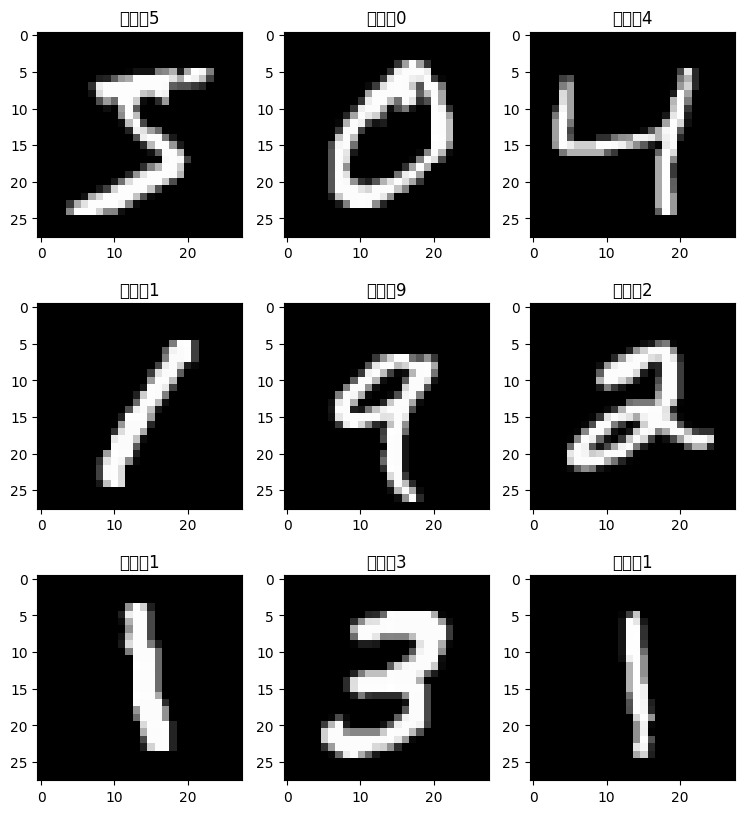

In [ ]:
"""
通过gzip和numpy解析MNIST数据集的二进制文件, 并可视化训练集前10张图片和标签
"""

import os
import gzip
import logging

import numpy as np
import matplotlib.pyplot as plt

logging.basicConfig(format="%(message)s", level=logging.DEBUG)  # 设置Python日志管理工具的消息格式和显示级别

plt.rcParams["font.sans-serif"] = "SimHei"  # 确保plt绘图正常显示中文
plt.rcParams["figure.figsize"] = [9, 10]  # 设置plt绘图尺寸

def parse_mnist(minst_file_addr: str = None) -> np.array:
    """解析MNIST二进制文件, 并返回解析结果
    输入参数:
        minst_file: MNIST数据集的文件地址. 类型: 字符串.

    返回值:
        解析后的numpy数组
    """
    if minst_file_addr is not None:
        minst_file_name = os.path.basename(minst_file_addr)  # 根据地址获取MNIST文件名字
        with gzip.open(filename=minst_file_addr, mode="rb") as minst_file:
            mnist_file_content = minst_file.read()
        if "label" in minst_file_name:  # 传入的为标签二进制编码文件地址
            data = np.frombuffer(buffer=mnist_file_content, dtype=np.uint8, offset=8)  # MNIST标签文件的前8个字节为描述性内容，直接从第九个字节开始读取标签，并解析
        else:  # 传入的为图片二进制编码文件地址
            data = np.frombuffer(buffer=mnist_file_content, dtype=np.uint8, offset=16)  # MNIST图片文件的前16个字节为描述性内容，直接从第九个字节开始读取标签，并解析
            data = data.reshape(-1, 28, 28)
    else:
        logging.warning(msg="请传入MNIST文件地址!")

    return data


if __name__ == "__main__":
    train_imgs = parse_mnist(minst_file_addr="./input/train-images-idx3-ubyte.gz")  # 训练集图像
    train_labels = parse_mnist(minst_file_addr="./input/train-labels-idx1-ubyte.gz")  # 训练集标签
    
    # 可视化
    fig, ax = plt.subplots(ncols=3, nrows=3)
    ax[0, 0].imshow(train_imgs[0], cmap=plt.cm.gray)
    ax[0, 0].set_title(f"标签为{train_labels[0]}")
    ax[0, 1].imshow(train_imgs[1], cmap=plt.cm.gray)
    ax[0, 1].set_title(f"标签为{train_labels[1]}")
    ax[0, 2].imshow(train_imgs[2], cmap=plt.cm.gray)
    ax[0, 2].set_title(f"标签为{train_labels[2]}")
    ax[1, 0].imshow(train_imgs[3], cmap=plt.cm.gray)
    ax[1, 0].set_title(f"标签为{train_labels[3]}")
    ax[1, 1].imshow(train_imgs[4], cmap=plt.cm.gray)
    ax[1, 1].set_title(f"标签为{train_labels[4]}")
    ax[1, 2].imshow(train_imgs[5], cmap=plt.cm.gray)
    ax[1, 2].set_title(f"标签为{train_labels[5]}")
    ax[2, 0].imshow(train_imgs[6], cmap=plt.cm.gray)
    ax[2, 0].set_title(f"标签为{train_labels[6]}")
    ax[2, 1].imshow(train_imgs[7], cmap=plt.cm.gray)
    ax[2, 1].set_title(f"标签为{train_labels[7]}")
    ax[2, 2].imshow(train_imgs[8], cmap=plt.cm.gray)
    ax[2, 2].set_title(f"标签为{train_labels[8]}")
    plt.show()  # 显示绘图

    # print(plt.rcParams.keys())



In [ ]:
print(train_imgs.shape)
print(train_labels.shape)
print(train_imgs[0])

(60000, 28, 28)
(60000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

# 数据预处理

In [ ]:
import torch
x_train,y_train = map(torch.Tensor, (train_imgs, train_labels))
print(x_train.shape)
print(y_train.shape)
print(y_train[:10])

torch.Size([60000, 28, 28])
torch.Size([60000])
tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4.])


/var/folders/d9/xwbxr3mj5jnccxn31l_5g_zh0000gn/T/ipykernel_805/1256590853.py:2: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:212.)
  x_train,y_train = map(torch.Tensor, (train_imgs, train_labels))


In [15]:
# 测试
import torch.nn.functional as F

loss_func=F.cross_entropy

bs=64
weight=torch.randn([bs, 28, 10])
def model(xb):
    return torch.matmul(xb, weight) 

In [20]:

xb=x_train[0:bs]
yb=y_train[0:bs]

print(yb.shape)
print(yb)


y_predict=model(xb)
print(y_predict.shape)
loss_func(y_predict, yb)

torch.Size([64])
tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.])
torch.Size([64, 28, 10])


RuntimeError: Expected target size [64, 10], got [64]